## Visualize FCGR in input and output.

In [9]:
import json
import sys
sys.path.append("..")
import tensorflow as tf
from pathlib import Path
from src.dnn.loaders.VARdataloader import DataLoaderVAR as DataLoader

PATH_EXP = "/data/bacteria/experiments/autoencoders/6mer/27122023-5"

In [10]:
# encoder = tf.keras.models.load_model(f"{PATH_EXP}/models/encoder.keras")
# encoder = tf.keras.models.load_model(f"{PATH_EXP}/models/decoder.keras")
autoencoder = tf.keras.models.load_model(f"{PATH_EXP}/checkpoints/weights-CNNAutoencoderCAEBN.keras")

In [11]:
list_fcgr = list(Path("/data/bacteria/experiments/autoencoders/6mer/fcgr").rglob("*/*.npy"))


In [12]:
from collections import defaultdict

paths_by_specie=defaultdict(list)
for path in list_fcgr:
    specie=path.parent.stem.split("__")[0]
    paths_by_specie[specie].append(path)


In [13]:
list_files = [p[0] for s,p in paths_by_specie.items()][-20:]
list_files, len(list_files)

([PosixPath('/data/bacteria/experiments/autoencoders/6mer/fcgr/xanthomonas_oryzae__01/SAMN05953160.npy'),
  PosixPath('/data/bacteria/experiments/autoencoders/6mer/fcgr/bacteroides_fragilis__01/SAMEA3545279.npy'),
  PosixPath('/data/bacteria/experiments/autoencoders/6mer/fcgr/cutibacterium_acnes__01/SAMN01907087.npy'),
  PosixPath('/data/bacteria/experiments/autoencoders/6mer/fcgr/clostridium_perfringens__01/SAMN05929578.npy'),
  PosixPath('/data/bacteria/experiments/autoencoders/6mer/fcgr/pseudomonas_fluorescens__01/SAMN09428383.npy'),
  PosixPath('/data/bacteria/experiments/autoencoders/6mer/fcgr/lactobacillus_salivarius__01/SAMN06473742.npy'),
  PosixPath('/data/bacteria/experiments/autoencoders/6mer/fcgr/burkholderia_cepacia__01/SAMN03449419.npy'),
  PosixPath('/data/bacteria/experiments/autoencoders/6mer/fcgr/moraxella_catarrhalis__01/SAMN05614887.npy'),
  PosixPath('/data/bacteria/experiments/autoencoders/6mer/fcgr/roseburia_hominis__01/SAMEA3539452.npy'),
  PosixPath('/data/bact

In [14]:
# preprocessing of each FCGR to feed the model 
preprocessing = lambda x: x / x.max() 

# compute embeddings
data_batches = DataLoader(
    list_paths=list_files,
    batch_size=10,
    shuffle=False,
    preprocessing=preprocessing,
    inference_mode=True
)


In [15]:
arrays_outputs = []
arrays_inputs = []
PATH_SAVE=Path("../preds")
PATH_SAVE.mkdir(parents=True, exist_ok=True)

for data in iter(data_batches):
    inputs = data
    outputs = autoencoder(data).numpy()
    arrays_inputs.append(
        inputs
    )
    arrays_outputs.append(
        outputs
    )

In [16]:
import numpy as np 
all_outputs = np.concatenate(arrays_outputs, axis=0).squeeze(axis=-1)
all_inputs = np.concatenate(arrays_inputs, axis=0).squeeze(axis=-1)


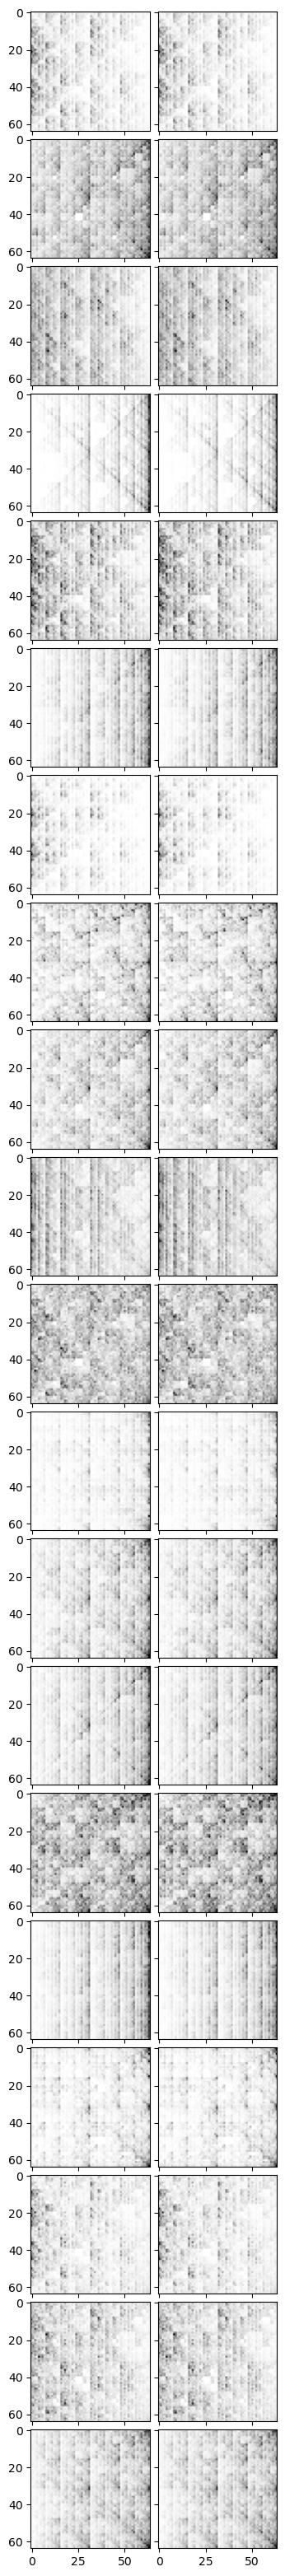

In [21]:
from complexcgr import FCGR
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fcgr = FCGR(6)
fig = plt.figure(1,(5,40))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(20,2),
                 axes_pad=0.1,
                 )
i=0
for inp, out in zip(all_inputs, all_outputs):
    grid[i].imshow(fcgr.plot(inp),'gray',)
    grid[i+1].imshow(fcgr.plot(out),'gray',)
    i+=2
    

In [51]:
# np.save(PATH_SAVE.joinpath("inputs.npy"),arr=all_inputs)
# np.save(PATH_SAVE.joinpath("outpuss.npy"),arr=all_outputs)

In [52]:
# for inp, out in zip(all_inputs, all_outputs):
#     print(np.linalg.norm(inp-out))

0.32456955022894546
2.7713835686348727
0.5125577978905487
0.4853572506534442
0.5733884922054296
0.5413887975353551
0.28836238138593595
0.7351346258854752
2.086984574590038
1.9544671974557217
0.47176542801608223
0.3769773011829245
1.1220485708665686
0.34256711563851455
1.400527067026442
0.4725478428693151
0.4068959230092596
0.3332810011039021
0.4130907095978195
0.46422983720582117
